# Cornell Case Competition
- Team 13

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import AlgoLoop as al

## 0. Loading Data

In [2]:
# IDX
IDX_price = pd.read_csv('IDX_price.csv')
IDX_return = pd.read_csv('IDX_return.csv')

# ETF
ETF_price = pd.read_csv('ETF_price.csv')
ETF_return = pd.read_csv('ETF_return.csv')

In [3]:
# Getting the years of data
IDX_year = list(IDX_price['Date'].apply(lambda x:int(x[:4])).unique())
ETF_year = list(ETF_price['Date'].apply(lambda x:int(x[:4])).unique())

In [4]:
# Setting the index
IDX_price = IDX_price.set_index('Date')
IDX_return = IDX_return.set_index('Date')
ETF_price = ETF_price.set_index('Date')
ETF_return = ETF_return.set_index('Date')

In [5]:
# Datetime Index
IDX_price.index = pd.to_datetime(IDX_price.index)
IDX_return.index = pd.to_datetime(IDX_return.index)
ETF_price.index = pd.to_datetime(ETF_price.index)
ETF_return.index = pd.to_datetime(ETF_return.index)

## 1. Function of Risk:= f(Age)

In [6]:
x = np.arange(25, 66)

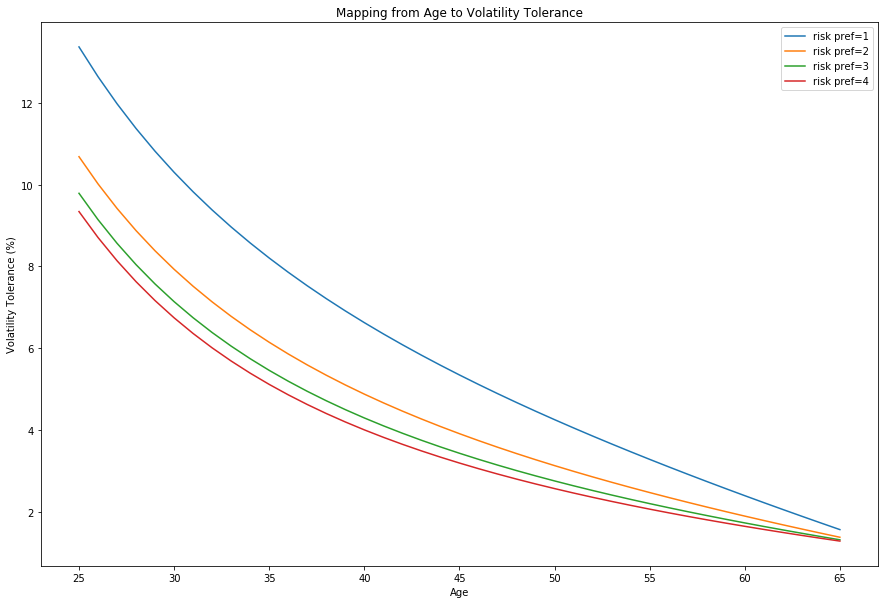

In [7]:
al.AgeRiskPlot(x)

## 2. Portfolio using Index as Instruments

### 2.1 Generating the price and return of each portfolios

In [8]:
# record the name of instruments we trade
IDX_col = {'tbill':'T-Bill', 'agg':'US AggIndex', 'russell':'Russell 1000'}

# calculate the value & return of differents portfolios
for i in range(1,10):
    w_equity = 0.1 * i
    lv = al.PortfolioPrices(IDX_price, w_equity, IDX_col, IDX_year)
    col_name = round(i/(10 - i), 2)
    IDX_price[col_name] = lv
    IDX_return[col_name] = IDX_price[col_name]/IDX_price[col_name].shift() - 1

In [9]:
IDX_return.head()

,T-Bill,US AggIndex,S&P 500,Russell 1000,0.11,0.25,0.43,0.67,1.0,1.5,2.33,4.0,9.0
Date,,,,,,,,,,,,,
2010-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-26,0.000000,-0.000173,-0.004212,-0.004112,-0.000500,-0.000827,-0.001139,-0.001450,-0.001771,-0.002116,-0.002500,-0.002941,-0.003465
2010-01-27,0.000833,-0.000448,0.004880,0.004343,0.000298,0.000726,0.001117,0.001491,0.001864,0.002251,0.002669,0.003137,0.003682
2010-01-28,0.000000,-0.000147,-0.011818,-0.012134,-0.001231,-0.002236,-0.003188,-0.004132,-0.005105,-0.006148,-0.007303,-0.008627,-0.010198
2010-01-29,-0.000832,0.002449,-0.009829,-0.010453,0.000485,-0.000657,-0.001705,-0.002710,-0.003715,-0.004760,-0.005892,-0.007162,-0.008646


### 2.2 Fitting the relation of Volatility ($\sigma$) v.s. Weights Ratio (r=Equity/Bonds) 

In [10]:
# 8 years data as training set, 2 years as test set
IDX_Train = IDX_return.iloc[:-514,4:]
IDX_Test = IDX_return.iloc[-514:,4:]

In [11]:
# annual std 
IDX_Train_AnnSTD = IDX_Train.std() * np.sqrt(250)
IDX_Test_AnnSTD = IDX_Test.std() * np.sqrt(250)

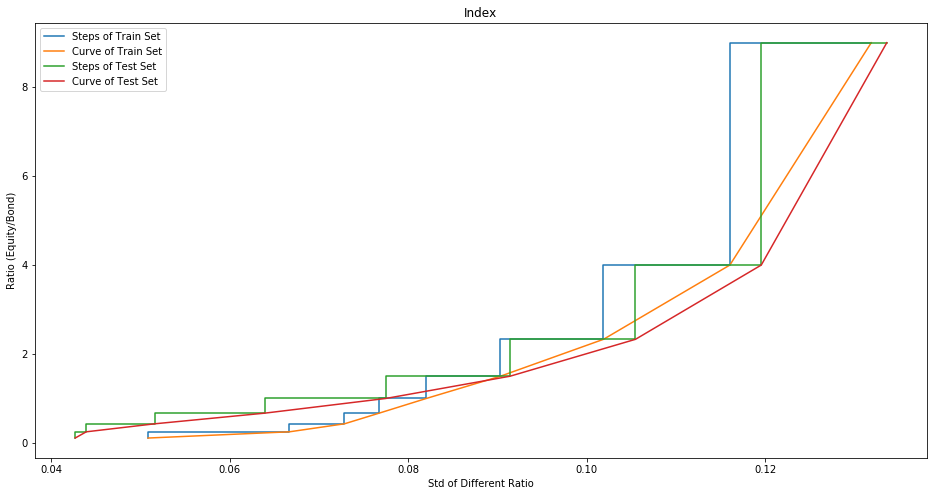

In [12]:
al.StdPlot(IDX_Train_AnnSTD, IDX_Test_AnnSTD, title_name='Index')

### 2.3 Performance Testing

Fixed Age = [25,35,45,55,65], Risk_Pref = [1,2,3,4] -> [Vol1,  Vol2, Vol3, Vol4] -> [Ratio1, Ratio2, Ratio3, Ratio4] -> Return graph on Test set.

#### 2.3.1 Generating Ratio Matrix

In [13]:
IDX_STD_List = []

for a in [25,35,45,55,65]:
    IDX_STD_List.append([al.Age_Risk_Map(age=a, risk_pref=i, coef=8) for i in range(1,5)])

IDX_STD_Matrix = np.array(IDX_STD_List)/100

In [14]:
IDX_RATIO_Matrix = al.StdToRatio(IDX_Train_AnnSTD, IDX_STD_Matrix)
IDX_RATIO_Matrix = IDX_RATIO_Matrix.astype(int)

In [15]:
IDX_RATIO_Matrix

array([[8, 7, 6, 6],
       [5, 1, 1, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

#### 2.3.2 Plot the time series graph

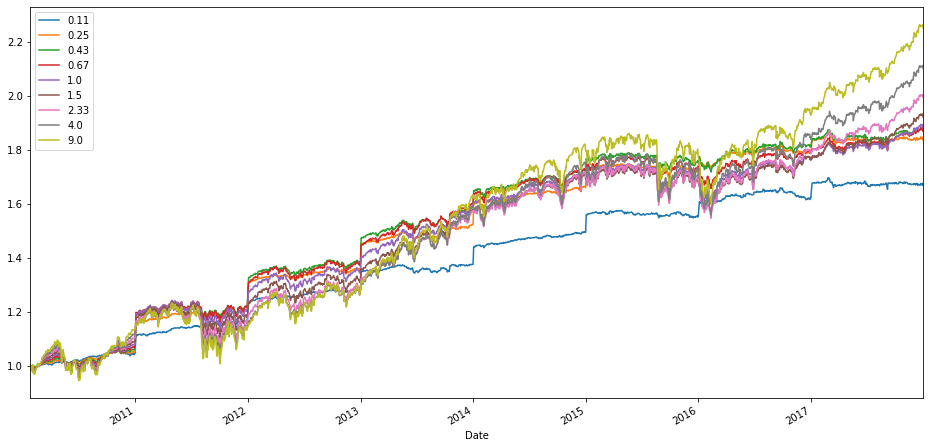

In [16]:
IDX_Train_return = IDX_Train + 1
IDX_Train_return = IDX_Train_return.cumprod()
IDX_Train_return.plot(figsize=(16,8))

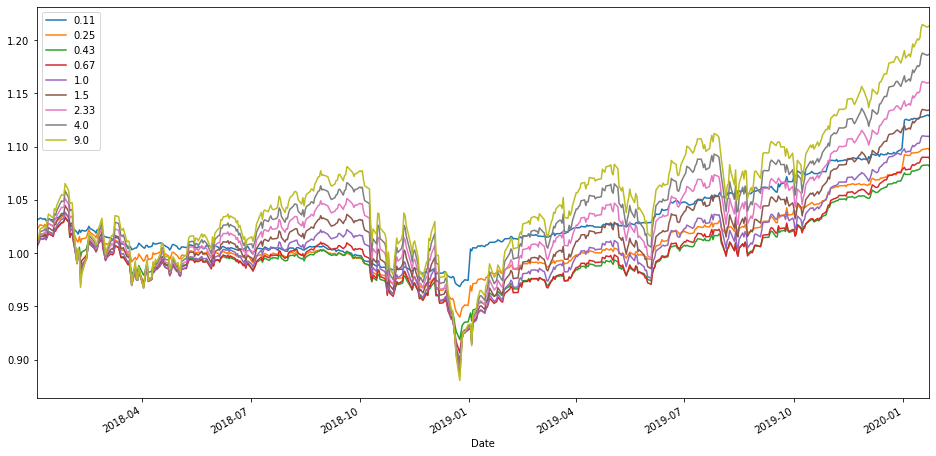

In [17]:
IDX_Test_return = IDX_Test + 1
IDX_Test_return = IDX_Test_return.cumprod()
IDX_Test_return.plot(figsize=(16,8))

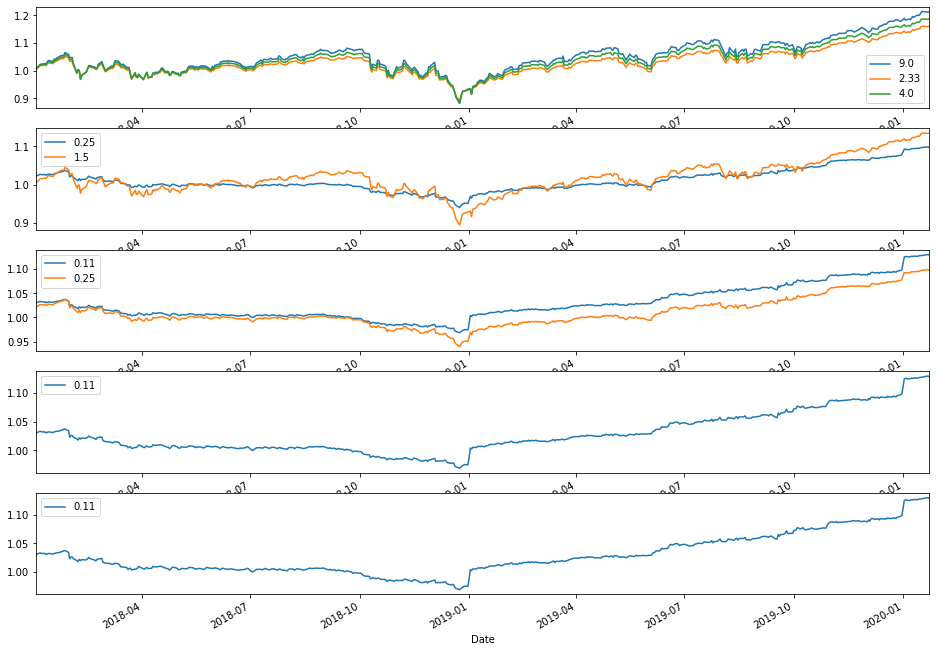

In [18]:
# Age = 25
al.ReturnPlot(IDX_Test, IDX_RATIO_Matrix)

## 3. Portfolio using ETFs as Instruments

### 3.1 Generating the price and return of each portfolios

In [19]:
# record the name of instruments we trade
ETF_col = {'tbill':'T-Bill ETF', 'agg':'US AggETF', 'russell':'Russell 1000 ETF'}

In [20]:
# calculate the value & return of differents portfolios
for i in range(1,10):
    w_equity = 0.1 * i
    lv = al.PortfolioPrices(ETF_price, w_equity, ETF_col, ETF_year)
    col_name = round(i/(10 - i), 2)
    ETF_price[col_name] = lv
    ETF_return[col_name] = ETF_price[col_name]/ETF_price[col_name].shift() - 1

### 3.2 Fitting the relation of Volatility ($\sigma$) v.s. Weights Ratio (r=Equity/Bonds)

In [22]:
# 8 years data as training set, 2 years as test set
ETF_Train = ETF_return.iloc[:-511,4:]
ETF_Test = ETF_return.iloc[-511:,4:]

In [23]:
# annual std 
ETF_Train_AnnSTD = ETF_Train.std() * np.sqrt(250)
ETF_Test_AnnSTD = ETF_Test.std() * np.sqrt(250)

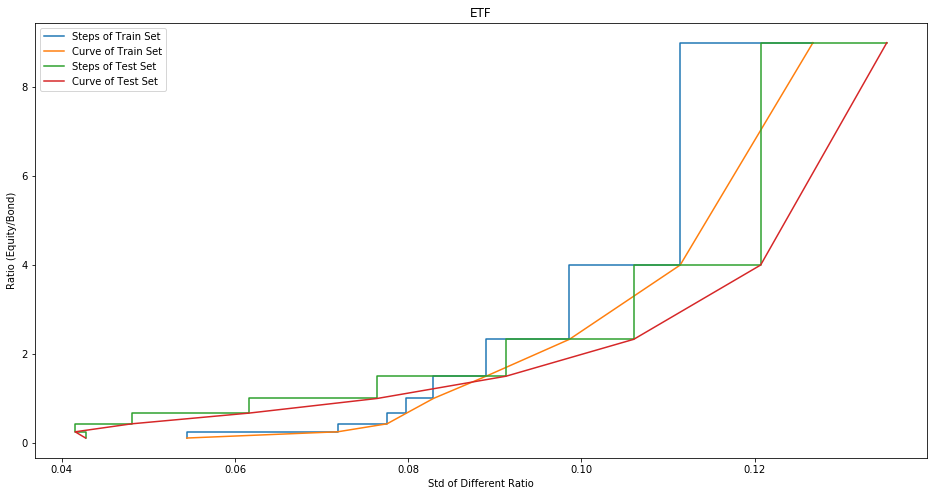

In [24]:
al.StdPlot(ETF_Train_AnnSTD, ETF_Test_AnnSTD, title_name='ETF')

#### 3.3.1 Generating Ratio Matrix

In [25]:
ETF_RATIO_Matrix = IDX_RATIO_Matrix
ETF_RATIO_Matrix

array([[8, 7, 6, 6],
       [5, 1, 1, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

#### 2.3.2 Plot the time series graph

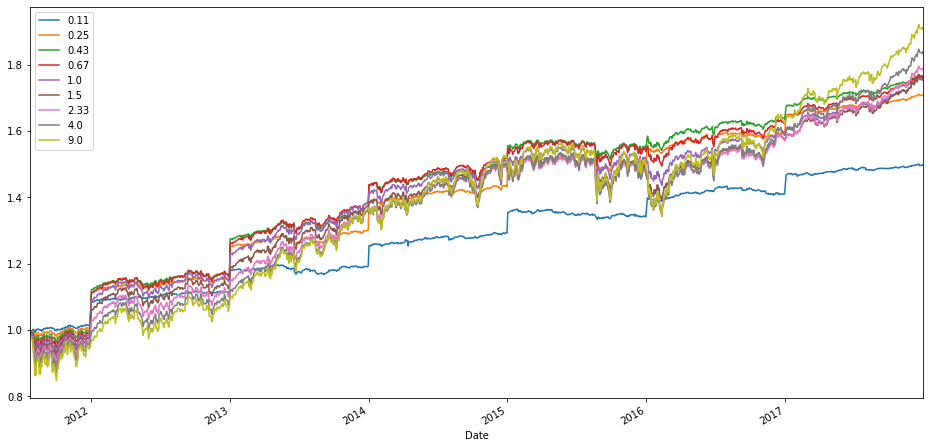

In [26]:
ETF_Train_return = ETF_Train + 1
ETF_Train_return = ETF_Train_return.cumprod()
ETF_Train_return.plot(figsize=(16,8))

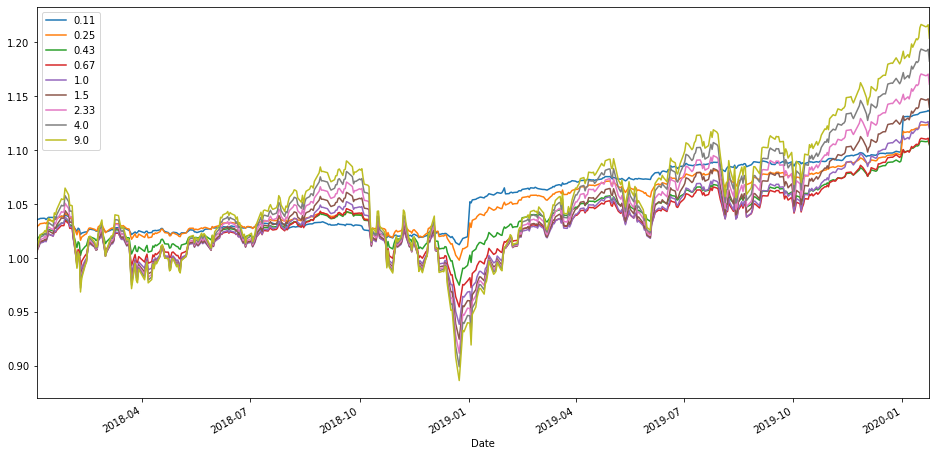

In [27]:
ETF_Test_return = ETF_Test + 1
ETF_Test_return = ETF_Test_return.cumprod()
ETF_Test_return.plot(figsize=(16,8))

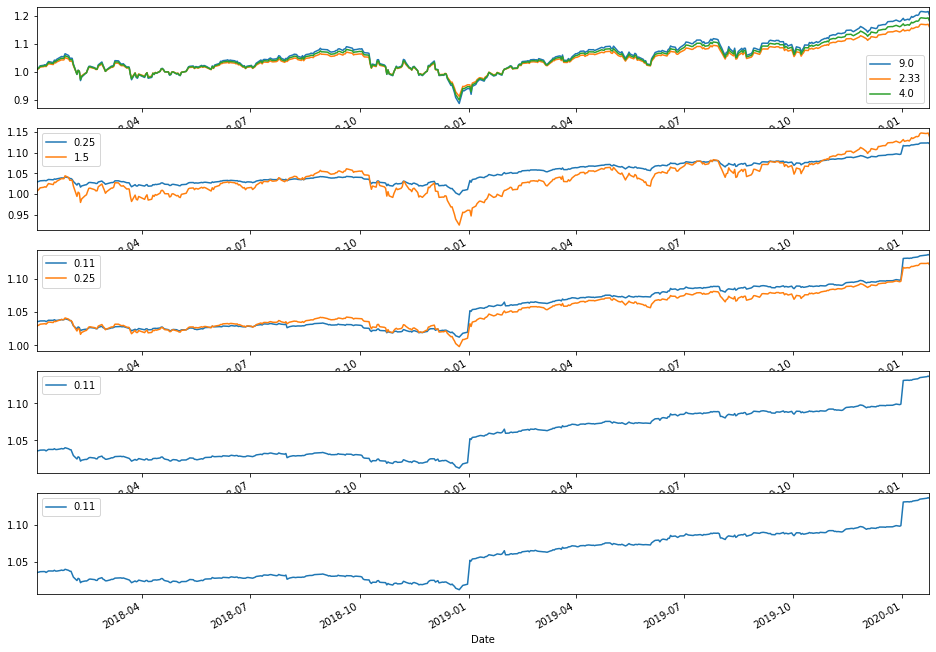

In [28]:
# Age = 25
al.ReturnPlot(ETF_Test, ETF_RATIO_Matrix)